In [225]:
import pandas as pd
import numpy as np
import UpdateME 
from UpdateME import cellfinder_output_path
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from bg_atlasapi.bg_atlas import BrainGlobeAtlas
import scipy as stats


In [226]:
# Path to cellfinder_output points.npy file
cells_path = cellfinder_output_path + 'points/points.npy'
cells_path
points = np.load(cells_path)
print(points.shape)

(98726, 3)


# Define a reference cell 

In [227]:
# Define the reference point 
estim_tip_coordinates = points[5000]
print(estim_tip_coordinates)

[7700.  100. 6500.]


# Finding what brain region the reference cell is from

# Euclidean Distance

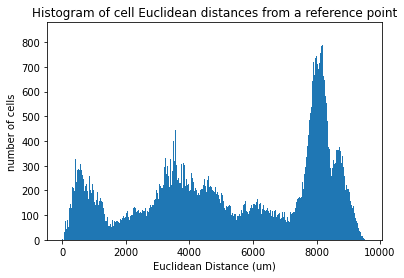

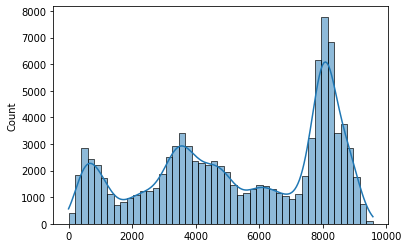

In [219]:

# Subtract the reference point from each cell coordinate
displacement = points - estim_tip_coordinates
# Calculate the magnitude of the displacement vectors
euclidean_distances = np.linalg.norm(displacement, axis=1)


plt.hist(euclidean_distances, bins=500)
# Add labels and a title
plt.xlabel('Euclidean Distance (um)')
plt.ylabel('number of cells')
plt.title('Histogram of cell Euclidean distances from a reference point')
# Display the histogram
plt.show()
sns.histplot(euclidean_distances, kde = True)


# Manhattan distance
#### from scipy.spatial import distance

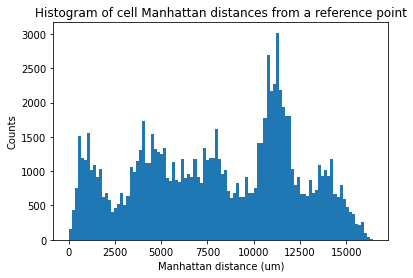

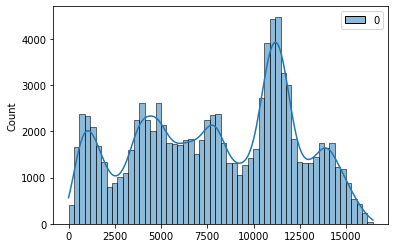

In [220]:
manhattan_distances = np.sum(np.abs(points - estim_tip_coordinates), axis=1)
manhattan_distances = distance.cdist(points, [estim_tip_coordinates], metric='cityblock')

# Plot the histogram
plt.hist(manhattan_distances, bins = 100)

# Add labels
plt.title('Histogram of cell Manhattan distances from a reference point')
plt.xlabel('Manhattan distance (um)')
plt.ylabel('Counts')

# Display the histogram
plt.show()

sns.histplot(manhattan_distances, kde = True)

# Minkowski distance
#### generalization of Manhattan and Euclidean distance, it is defined as the sum of the absolute differences of their coordinates raised to a power p

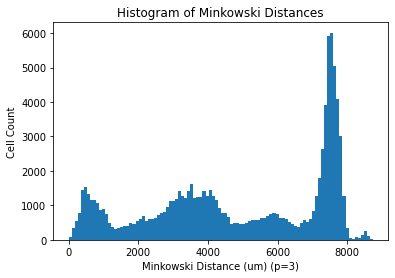

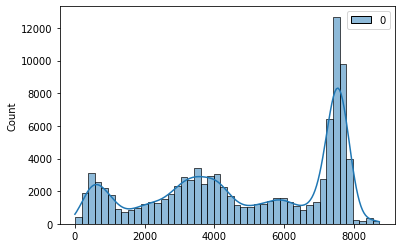

In [221]:
p = 3
minkowski_distances = distance.cdist(points, [estim_tip_coordinates], 'minkowski', p=p)

plt.hist(minkowski_distances, bins=100)
plt.xlabel('Minkowski Distance (um) (p={})'.format(p))
plt.ylabel('Cell Count')
plt.title('Histogram of Minkowski Distances')
plt.show()
sns.histplot(minkowski_distances, kde = True)


# Chebyshev distance

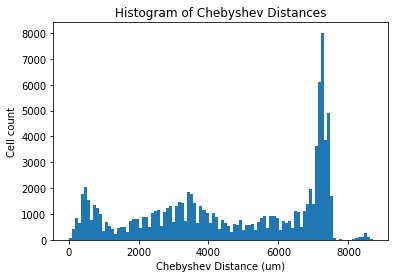

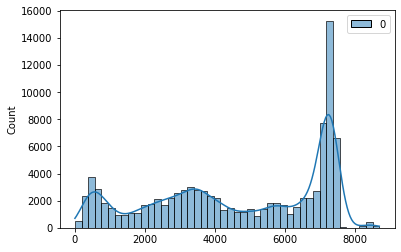

In [222]:
chebyshev_distances = distance.cdist(points, [estim_tip_coordinates], 'chebyshev')
plt.hist(chebyshev_distances, bins=100)
plt.xlabel('Chebyshev Distance (um)')
plt.ylabel('Cell count')
plt.title('Histogram of Chebyshev Distances')
plt.show()
sns.histplot(chebyshev_distances, kde = True)


# Mahalanobis distance

In [223]:
print("inital points shape: " +str(points.shape))
cov = np.cov(points.T)
print("inital cov shape: " +str(cov.shape))
inv_cov = np.linalg.inv(cov)
print("inital inv_cov shape: " +str(inv_cov.shape))

mean = np.mean(points, axis=0)

# points = points.reshape(-1)
points = points.reshape(-1,1)
print("reshaped (-1,1) points shape: " +str(points.shape))

mahalanobis_distance = distance.mahalanobis(points, estim_tip_coordinates, inv_cov)
# mahalanobis_distance = distance.mahalanobis(points, estim_tip_coordinates[0], inv_cov)
# mahalanobis_distance = distance.mahalanobis(points, estim_tip_coordinates.reshape(-1), inv_cov)
# mahalanobis_distance = distance.mahalanobis(points, estim_tip_coordinates.reshape(-1), inv_cov)
# mahalanobis_distance = distance.mahalanobis(points, estim_tip_coordinates.flatten(), inv_cov)

plt.hist(mahalanobis_distance, bins=10)
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Count')
plt.title('Histogram of Mahalanobis Distances')
plt.show()

inital points shape: (98726, 3)
inital cov shape: (3, 3)
inital inv_cov shape: (3, 3)
reshaped (-1,1) points shape: (296178, 1)


ValueError: Input vector should be 1-D.

# Definition of cell coordinates 

#### In the Paxinos-Franklin coordinate system, the x-coordinate corresponds to the medial-lateral axis, with positive values towards the right and negative values towards the left. The y-coordinate corresponds to the dorsal-ventral axis, with positive values towards the dorsal side and negative values towards the ventral side. The z-coordinate corresponds to the rostral-caudal axis, with positive values towards the rostral side and negative values towards the caudal side. 
#### refrence_point = [8050. -100. 6150.]
#### Therefore, for each row of the array, the first value (8050. in the first row for example) corresponds to the medial-lateral position of the cell, with a positive value indicating the cell is located towards the right of the brain. The second value (-100. in the first row for example) corresponds to the dorsal-ventral position of the cell, with a negative value indicating the cell is located towards the ventral side of the brain. The third value (6150. in the first row for example) corresponds to the rostral-caudal position of the cell, with a positive value indicating the cell is located towards the rostral side of the brain.

# Euclidean Distance Calculation

#### The distance calculation is based on the euclidean distance, which is a measure of the straight-line distance between two points in a multidimensional space, it can be calculated using the Pythagorean theorem. It's defined as the square root of the sum of the squared differences of the coordinates between the two points.

#### Calculate the magnitude of the displacement vectors
#### distances = np.linalg.norm(displacement, axis=1)

# Other 3D Space Measurement options

### There are a few other common measurements used to determine the distance between two points in 3D space, besides euclidean distance. Some examples include:

## 1. Manhattan distance: 
#### Also known as "taxi cab" distance, it is the sum of the absolute differences of their coordinates. This distance can be useful when movement is constrained to a grid, such as in a city.

## 2. Chebyshev distance:
#### Also known as chessboard distance, it is the maximum of the absolute differences of their coordinates. This distance can be useful when movement is constrained to a grid, such as in a chess board.

## 3. Minkowski distance: 
#### it is a generalization of Manhattan and Euclidean distance, it is defined as the sum of the absolute differences of their coordinates raised to a power p. It is a metric when p>=1, this distance can be useful when considering different scales.
##### Minkowski distance is a measure of distance between two points in a normed vector space. It is a generalization of Euclidean distance (p=2) and Manhattan distance (p=1). The distance is calculated as the p-norm of the difference between the two points, where p is a positive integer or infinity (in this case it is the p that you specified when calculating the distances). The resulting unit of measurement depends on the unit of measurement of the vector space in which the points lie. In the case you have provided, the coordinates are in micrometers, so the unit of measurement of the Minkowski distance will be in micrometers as well.

## 4. Mahalanobis distance: 
#### It is a distance metric that takes into account the covariance of the data. It is calculated as the square root of the difference between two points, projected onto the direction of the eigenvectors of the covariance matrix.

## 5. Cosine similarity: 
#### it is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.